


##### 题目描述

二叉树也可以用数组来存储，给定一个数组，树的根节点的值存储在下标1，对于存储在下标N的节点，它的左子节点和右子节点分别存储在下标2*N和2*N+1，并且我们用值-1代表一个节点为空。

给定一个数组存储的二叉树，试求从根节点到最小的叶子节点的路径，路径由节点的值组成。

##### 输入描述

输入一行为数组的内容，数组的每个元素都是正整数，元素间用空格分隔。

注意第一个元素即为根节点的值，即数组的第N个元素对应下标N，下标0在树的表示中没有使用，所以我们省略了。

输入的树最多为7层。

## 输出描述
输出从根节点到最小叶子节点的路径上，各个节点的值，由空格分隔，用例保证最小叶子节点只有一个。

用例
| 输入                  | 输出         | 说明                                                         |
|-----------------------|--------------|--------------------------------------------------------------|
| 3 5 7 -1 -1 2 4       | 3 7 2        | 最小叶子节点的路径为3 7 2。                                  |
| 5 9 8 -1 -1 7 -1 -1 -1 -1 -1 6 | 5 8 7 6     | 最小叶子节点的路径为5 8 7 6，注意数组仅存储至最后一个非空节点，故不包含节点“7”右子节点的-1。 |


题目解析


本题有两种思路，一种是从树顶节点向下找，直到找到最小值节点。

这种方式是典型的深度优先搜索。
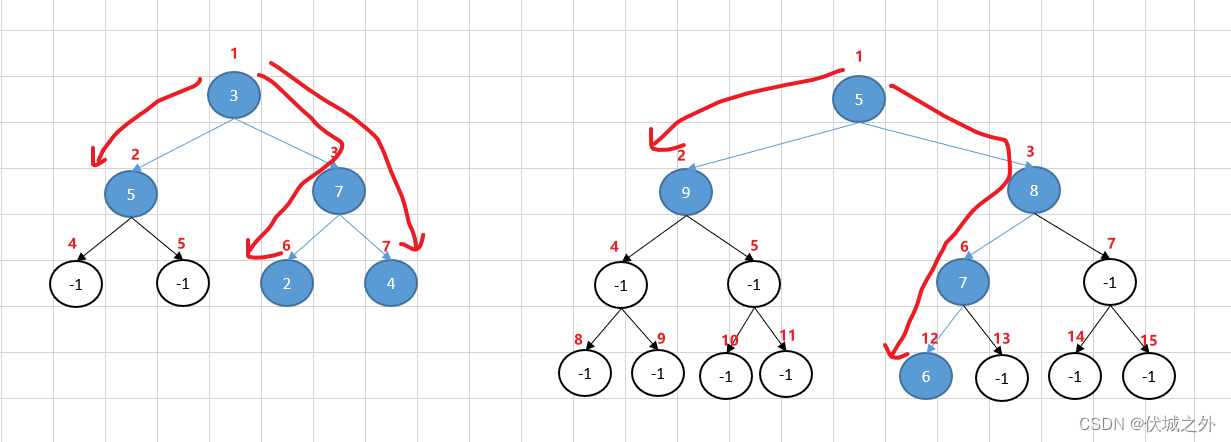


还有一种思路是先找到最小值节点，然后从最小值节点向上找父节点，由于向上找只有一个父节点，因此只有一种路径。

因此，我们应该选择这种方式。
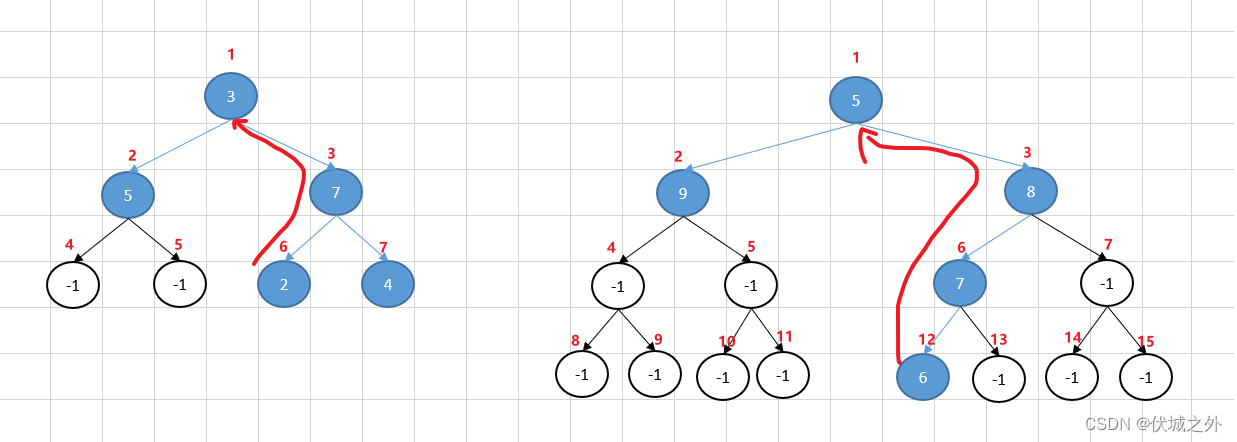



采用这种方式，首先需要找到最小值节点在数组中的索引位置idx，然后根据题目定义的规则

> 对于存储在下标N的节点，它的左子节点和右子节点分别存储在下标2*N和2*N+1

当然上面这个规则是针对根节点索引从1开始的，如果根节点索引从0开始算法，则上面规则应变为

> 对于存储在下标N的节点，它的左子节点和右子节点分别存储在下标2*N+1和2*N+2

每找到一个父节点，就将其当成新的子节点，继续向上找父节点，直到子节点本身就是树顶节点为止。

另外，如何找到最小值叶子节点呢？

我们可以反向遍历输入的节点数组，如果遍历的节点符合下面条件，那么他就是一个叶子节点：

- 自身节点值不为-1
- 自身没有子节点（即既没有左子节点，也没有右子节点）


In [ ]:
/* JavaScript Node ACM模式 控制台输入获取 */
const readline = require("readline");

const rl = readline.createInterface({
  input: process.stdin,
  output: process.stdout,
});

rl.on("line", (line) => {
  const arr = line.split(" ").map(Number);
  let n = arr.length - 1;
  // 最小叶子节点的值
  let min = Infinity;
  // 最小节点在数组中的索引位置
  let minIdx = -1;
  for (let i = n; i >= 0; i--) {
    if (arr[i] != -1) {
      if (i * 2 + 1 <= n && arr[i * 2 + 1] != -1) continue;
      if (i * 2 + 2 <= n && arr[i * 2 + 2] != -1) continue;

      if (min > arr[i]) {
        min = arr[i];
        minIdx = i;
      }
    }
  }

  // path用于缓存最小叶子节点到根的路径
  const path = [];
  path.unshift(min);

  // 从最小值节点开始向上找父节点，直到树顶
  while (minIdx !== 0) {
    let f = Math.floor((minIdx - 1) / 2);
    path.unshift(arr[f]);
    minIdx = f;
  }

  console.log(path.join(" "));
});

: 